In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from functional import transfer_function_fresnel, circular_aperture, single_doe_spectral
from sota_does import spiral_doe, fresnel_lens

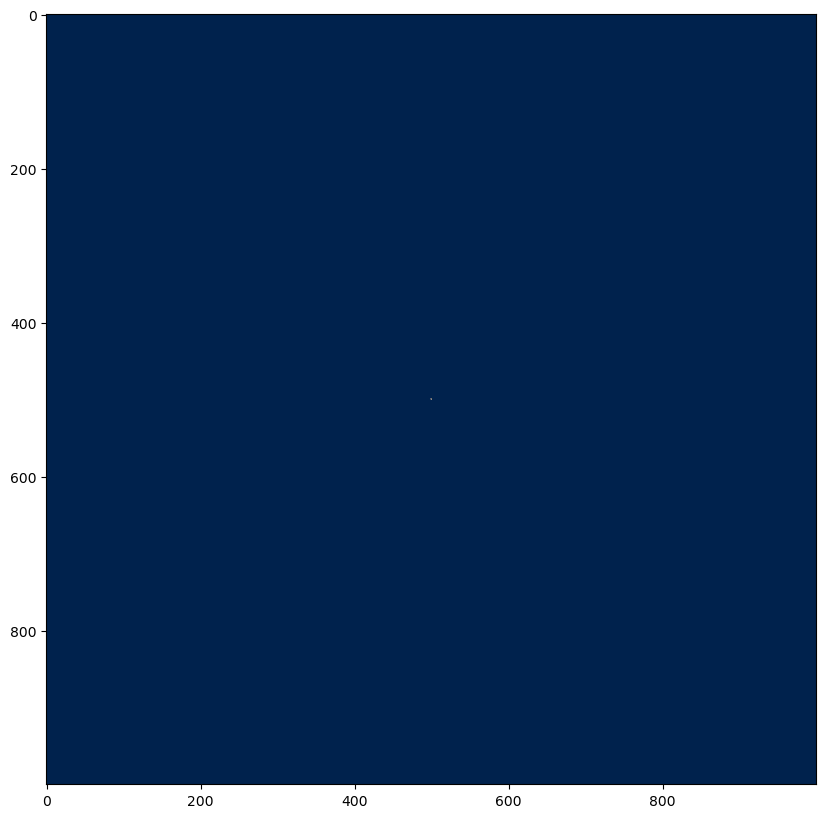

In [4]:

type_doe = "fresnel" # spiral, fresnel_lens


wavelengths=torch.Tensor([450, 550, 650])*1e-9
wave_resolution=(1000, 1000)
device='gpu'

source_distance = np.inf


if type_doe == "spiral":
    radius_doe = 0.5e-3
    sensor_distance=50e-3
    pixel_size = (2*radius_doe)/np.min(wave_resolution)
    height_map, aperture = spiral_doe(ny = wave_resolution[0], nx = wave_resolution[1], 
                    number_spirals = 3, radius = radius_doe, 
                    focal = 50e-3, start_w = 450e-9, end_w = 650e-9)

else:
    radius_doe =  2.5e-3
    focal = 50e-3
    sensor_distance=focal*0.88#+1e-3
    pixel_size = (2*radius_doe)/np.min(wave_resolution)
    height_map, aperture = fresnel_lens(ny = wave_resolution[0], nx = wave_resolution[1], focal= focal, radius=radius_doe)


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(height_map, cmap="viridis")
ax[1].imshow(aperture, cmap="plasma")

#plt.show()


psf = single_doe_spectral(height_map = height_map, aperture=aperture,
                        wavelengths = wavelengths, 
                        source_distance = source_distance, 
                        sensor_distance = sensor_distance, 
                        pixel_size = pixel_size)


psf = (psf - psf.min())/(psf.max()-psf.min())
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(psf.permute(1, 2, 0), cmap="plasma")
plt.show()
